# Course Title: Data Analytics & Statistics in Python  
## Metropolia University of Applied Sciences  
## Week 7: Mini-Project "Crypto Market Analysis (2015–2025)"  
### Date: 23.4.2025  

<table style="width: 100%;">
  <tr>
    <td style="text-align: left; vertical-align: middle;">
      <ul style="list-style: none; padding-left: 0;">
        <li><strong>Instructor</strong>: Hamed Ahmadinia, Ph.D</li>
        <li><strong>Email</strong>: hamed.ahmadinia@metropolia.fi</li>
        <li><strong>Web</strong>: www.ahmadinia.fi</li>
      </ul>
    </td>
  </tr>
</table>

**© 2025 Hamed Ahmadinia – [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/)**

In [371]:
# Loading nessesary library

import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and working with arrays
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For statistical data visualization with enhanced aesthetics

from scipy.stats import shapiro, mannwhitneyu, ttest_ind  # For statistical hypothesis tests: normality and comparing groups

from sklearn.linear_model import LinearRegression  # For performing linear regression modeling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # For evaluating regression model performance

In [373]:
# Step 1: Loading Dataset
file_path = "crypto_market_data_2018_2024.csv"  # Define the file path to the dataset
df = pd.read_csv(file_path)  # Load the dataset into a DataFrame

df['dates'] = pd.to_datetime(df['dates'])  # Convert the 'dates' column to datetime format for time-series analysis

df.head()  # Display the first 5 rows of the DataFrame to inspect the data

,dates,symbol,open,close,high,low,volume,adj_close
0,2018-01-15,TEL-USD,0.004678,0.006031,0.007141,0.004678,842193.0,0.006031
1,2018-01-16,TEL-USD,0.006056,0.004935,0.006077,0.004112,573317.0,0.004935
2,2018-01-17,TEL-USD,0.004989,0.004539,0.005347,0.003257,477139.0,0.004539
3,2018-01-18,TEL-USD,0.004591,0.007200,0.008505,0.004443,15296600.0,0.007200
4,2018-01-19,TEL-USD,0.007133,0.008325,0.008325,0.006071,15603100.0,0.008325


In [374]:
# Step 2: Check Data Distribution Using Shapiro-Wilk Test

def check_distribution(df):
    distribution_results = {}  # Dictionary to store results for each numeric column

    # Loop through all numeric columns in the DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        try:
            # Apply the Shapiro-Wilk test to a random sample of 5000 non-null values
            stat, p = shapiro(df[column].dropna().sample(n=5000, random_state=42))

            # Interpret the p-value to determine normality
            distribution_results[column] = "Normal Distribution" if p > 0.05 else "Skewed Distribution"
        except:
            # In case the test fails (e.g., not enough data), store a failure message
            distribution_results[column] = "Test Failed"

    return distribution_results  # Return the dictionary with results

# Call the function and store the results
distribution_results = check_distribution(df)

# Print the normality check results
print("Data Distribution Check:\n", distribution_results)

Data Distribution Check:
 {'open': 'Skewed Distribution', 'close': 'Skewed Distribution', 'high': 'Skewed Distribution', 'low': 'Skewed Distribution', 'volume': 'Skewed Distribution', 'adj_close': 'Skewed Distribution'}


In [375]:
# Step 3: Recommend Missing Data Imputation Strategy

def recommend_imputation(df, distribution_results):
    recommendations = {}  # Dictionary to store imputation recommendations for each column

    # Loop through all columns in the DataFrame
    for column in df.columns:
        missing_count = df[column].isnull().sum()  # Count of missing values in the column
        total_count = len(df)  # Total number of rows in the dataset
        missing_percentage = (missing_count / total_count) * 100  # Percentage of missing values
        dist = distribution_results.get(column, "Not Checked")  # Get distribution info (normal/skewed) from previous step

        print(f"\nColumn: {column}")

        if missing_count == 0:
            # Case: No missing data
            print("Missing: No missing values")
            print(f"Distribution: {dist}")
            print("Recommendation: No need")
            recommendations[column] = "No missing values"
        else:
            # Case: Missing data exists
            print(f"Missing: {missing_count} ({missing_percentage:.2f}%)")
            print(f"Distribution: {dist}")

            # Suggest imputation strategy based on missing percentage thresholds
            if missing_percentage < 5:
                print("Recommendation: Use Median Imputation")
                recommendations[column] = "Use Median Imputation"
            elif missing_percentage < 20:
                print("Recommendation: Use KNN Imputation or Median Imputation")
                recommendations[column] = "Use KNN Imputation or Median Imputation"
            elif missing_percentage < 30:
                print("Recommendation: Consider Multiple Imputation (MICE)")
                recommendations[column] = "Consider Multiple Imputation (MICE)"
            elif missing_percentage < 40:
                print("Recommendation: Use Model-Based Imputation")
                recommendations[column] = "Use Model-Based Imputation"
            else:
                print("Recommendation: Too many missing values — consider removing")
                recommendations[column] = "Too many missing values — consider removing"

    return recommendations  # Return the dictionary of column-wise imputation suggestions

# Apply the imputation recommendation function
missing_recommendations = recommend_imputation(df, distribution_results)


Column: dates
Missing: No missing values
Distribution: Not Checked
Recommendation: No need

Column: symbol
Missing: No missing values
Distribution: Not Checked
Recommendation: No need

Column: open
Missing: 25954 (1.19%)
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: close
Missing: 25954 (1.19%)
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: high
Missing: 25954 (1.19%)
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: low
Missing: 25954 (1.19%)
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: volume
Missing: 25954 (1.19%)
Distribution: Skewed Distribution
Recommendation: Use Median Imputation

Column: adj_close
Missing: 25954 (1.19%)
Distribution: Skewed Distribution
Recommendation: Use Median Imputation


In [376]:
# Step 4: Apply Median Imputation Based on Recommendations

# Loop through each column and its recommended imputation method
for col, method in missing_recommendations.items():
    if method == "Use Median Imputation":
        # Replace missing values with the median of the column
        df[col] = df[col].fillna(df[col].median())

# Show the updated DataFrame after applying imputation
print(df.head())  # Display the first few rows to verify changes

       dates   symbol      open     close      high       low      volume  \
0 2018-01-15  TEL-USD  0.004678  0.006031  0.007141  0.004678    842193.0   
1 2018-01-16  TEL-USD  0.006056  0.004935  0.006077  0.004112    573317.0   
2 2018-01-17  TEL-USD  0.004989  0.004539  0.005347  0.003257    477139.0   
3 2018-01-18  TEL-USD  0.004591  0.007200  0.008505  0.004443  15296600.0   
4 2018-01-19  TEL-USD  0.007133  0.008325  0.008325  0.006071  15603100.0   

   adj_close  
0   0.006031  
1   0.004935  
2   0.004539  
3   0.007200  
4   0.008325  


In [377]:
# Step 5: Time-Based Aggregation for All Cryptos

# Group the data by 'symbol' and calculate the average closing price for each cryptocurrency
daily_avg_all = (
    df.groupby('symbol')['close']
    .mean()
    .reset_index()
    .sort_values(by='close', ascending=False)  # Sort by average closing price in descending order
)

# Display the aggregated results
print(daily_avg_all.head())  # Show the top entries with the highest average close prices

              symbol         close
795    IBTC32716-USD  98168.943026
536         EBTC-USD  94493.638800
916    LBTC33652-USD  93552.931799
1541     SOLVBTC-USD  88943.687322
1542  SOLVBTCBBN-USD  88628.767578


In [378]:
# Step 6: Descriptive Summary for All Cryptos

# Group the data by 'symbol' and calculate descriptive statistics for the 'close' price:
# mean, median, standard deviation, min, max, and count of records
crypto_summary = (
    df.groupby('symbol')['close']
    .agg(['mean', 'median', 'std', 'min', 'max', 'count'])
    .reset_index()
)

# Display the descriptive summary for the first few cryptocurrencies
print(crypto_summary.head())

          symbol      mean    median       std       min       max  count
0        0X0-USD  0.142106  0.117010  0.112151  0.000318  0.493404    744
1      0XGAS-USD  0.150397  0.070139  0.182124  0.000042  0.875444    601
2      10SET-USD  1.293799  0.953680  1.116748  0.096181  5.939199   1414
3      1INCH-USD  1.298684  0.544172  1.443261  0.222429  7.477116   1511
4  3ULL26863-USD  0.002428  0.001583  0.002052  0.000315  0.009760    605


In [379]:
# Step 7: Hypothesis Testing - Compare BTC vs ETH (last 30 days)

# Get the most recent date in the dataset
latest_date = df['dates'].max()

# Filter the data to only include the last 30 days
last_30 = df[df['dates'] >= latest_date - pd.Timedelta(days=30)]

# Extract closing prices for BTC and ETH in the last 30 days
btc_close = last_30[last_30['symbol'] == 'BTC-USD']['close']
eth_close = last_30[last_30['symbol'] == 'ETH-USD']['close']

# Test for normality using the Shapiro-Wilk test
btc_stat, btc_p = shapiro(btc_close)
eth_stat, eth_p = shapiro(eth_close)

# Choose appropriate statistical test based on normality
if btc_p > 0.05 and eth_p > 0.05:
    # Both distributions are approximately normal → use parametric test
    stat, p_value = ttest_ind(btc_close, eth_close)
    test_used = "Independent t-test"
else:
    # At least one distribution is non-normal → use non-parametric test
    stat, p_value = mannwhitneyu(btc_close, eth_close)
    test_used = "Mann-Whitney U Test"

# Output test results
print(f"Test Used: {test_used}")
print(f"P-value: {p_value:.5f}")
if p_value < 0.05:
    print("Prices are significantly different.")
else:
    print("No significant difference between BTC and ETH prices.")

Test Used: Mann-Whitney U Test
P-value: 0.00000
Prices are significantly different.


## Optional: Predictive Modeling

In [386]:
# Step 8: Predictive Modeling with Performance Summary (with optional Positive Growth Filtering)

filter_positive_growth = True  # Set to True to recommend only cryptos with positive predicted growth

predictions = []  # List to store model performance and predictions for each crypto

# Loop through each unique cryptocurrency symbol
for symbol in df['symbol'].unique():
    # Filter and clean data for the current symbol
    symbol_df = df[df['symbol'] == symbol][['dates', 'close']].dropna().copy()

    # Skip symbols with too little data (for model reliability)
    if symbol_df['close'].nunique() < 50 or len(symbol_df) < 100:
        continue

    # Convert dates to number of days since the first date for regression modeling
    symbol_df['days'] = (symbol_df['dates'] - symbol_df['dates'].min()).dt.days
    X = symbol_df[['days']]  # Features
    y = symbol_df['close']   # Target

    try:
        # Split data chronologically into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

        # Train a linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict the price 30 days into the future
        future_day = pd.DataFrame([[symbol_df['days'].max() + 30]], columns=['days'])
        predicted_price = model.predict(future_day)[0]

        # Predict on the test set and evaluate performance
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Calculate growth rate from current to predicted future price
        current_price = y.iloc[-1]
        growth_rate = (predicted_price - current_price) / current_price

        # Store prediction if positive growth is expected or filtering is disabled
        if not filter_positive_growth or growth_rate > 0:
            predictions.append({
                'symbol': symbol,
                'current_price': current_price,
                'predicted_price': predicted_price,
                'growth_rate': growth_rate,
                'MAE': mae,
                'RMSE': rmse,
                'R2': r2
            })

    except Exception as e:
        continue  # Skip symbols that cause errors (e.g., during model training)

# Create a DataFrame to hold all prediction results
pred_df = pd.DataFrame(predictions)

# If predictions exist, show the top 10 cryptos sorted by model performance (R2 score)
if not pred_df.empty:
    pred_df = pred_df.sort_values(by='R2', ascending=False).head(10)
    title_suffix = " (Positive Growth Only)" if filter_positive_growth else ""
    print(f"\nTop 10 Recommended Cryptocurrencies by Model Performance{title_suffix}:")
    print(pred_df[['symbol', 'current_price', 'predicted_price', 'growth_rate', 'MAE', 'RMSE', 'R2']])


Top 10 Recommended Cryptocurrencies by Model Performance (Positive Growth Only):
              symbol  current_price  predicted_price  growth_rate       MAE  \
333        SUSDE-USD       1.151583         1.167743     0.014032  0.003069   
614          NOT-USD       0.002825         0.003027     0.071441  0.000763   
306         UNFI-USD       0.336828         0.475860     0.412766  0.843185   
587  PIRATE31704-USD       0.068045         0.073381     0.078414  0.020621   
11     ZERO31076-USD       0.000110         0.000133     0.205024  0.000034   
140         DUKO-USD       0.000208         0.000326     0.565166  0.000208   
7     BLAST28480-USD       0.004059         0.004739     0.167299  0.001509   
216          HEZ-USD       3.605058         3.822553     0.060330  0.122043   
666     WEN29175-USD       0.000031         0.000060     0.909899  0.000018   
262         MERL-USD       0.096103         0.125313     0.303935  0.053729   

         RMSE        R2  
333  0.003725  0.70859

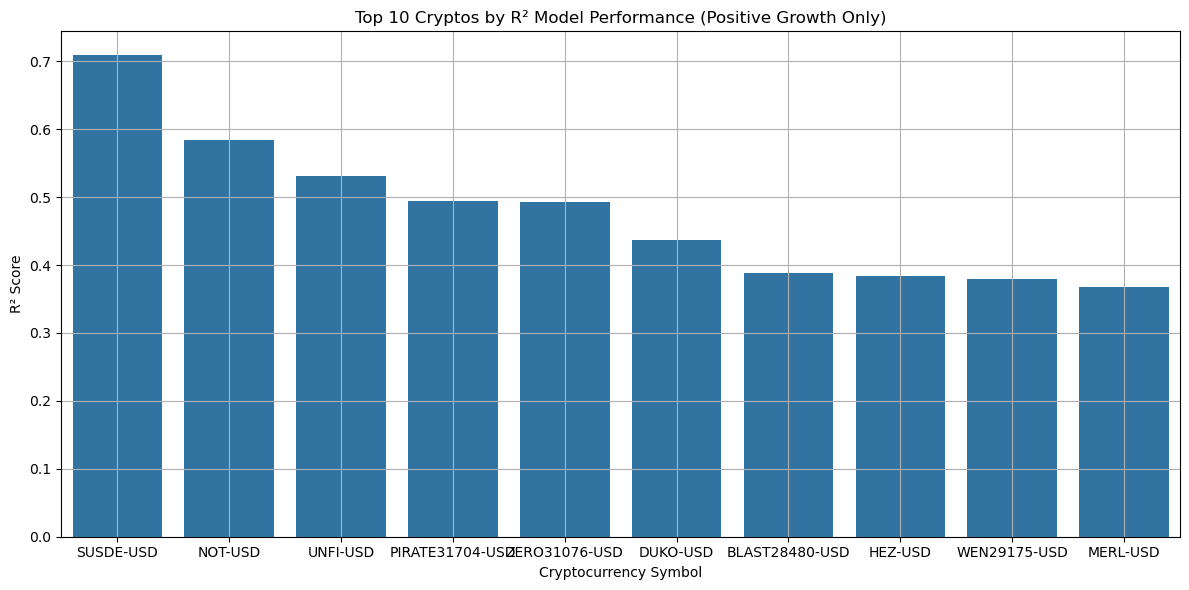

In [389]:
# Step 9: Visualization of Top 10 Models by R² Score (Positive Growth Only)

if not pred_df.empty:
    # Set up the plot size
    plt.figure(figsize=(12, 6))

    # Create a barplot of R² scores by cryptocurrency symbol
    sns.barplot(x='symbol', y='R2', data=pred_df)

    # Add a dynamic title based on the filtering condition
    title_suffix = " (Positive Growth Only)" if filter_positive_growth else ""
    plt.title(f'Top 10 Cryptos by R² Model Performance{title_suffix}')

    # Label axes and improve readability
    plt.ylabel('R² Score')
    plt.xlabel('Cryptocurrency Symbol')
    plt.grid(True)  # Add gridlines for better visual clarity
    plt.tight_layout()  # Optimize layout to avoid clipping
    plt.show()  # Display the plot